# Implementation of LOWESS Regression Algorithm


In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# Data generating function
Used for generating data with or without noise

In [2]:
def function(x):
     return np.sin(x)

In [3]:
def find_y(x, is_noisy:bool=True, mean=0.0, sigma=0.75):
    if is_noisy:
        return function(x) + np.random.normal(mean,sigma)
    else:
        return function(x)

In [4]:
def generate_data(left_bound, right_bound, number_of_points=100, is_noisy:bool=True):
    points_x = np.linspace(left_bound, right_bound, num=number_of_points)
    points_y = [find_y(x, is_noisy) for x in points_x]
    return points_x, points_y

# Kernels
1. Uniform
2. Triangle
3. Epanechnikov (a very hard second name)
4. Quartic
5. Gaussuian

TODO: add more Kernels


#### Uniform Kernel $[|r| \leq 1]$

In [5]:
def uniform_kernel(x, x0, h=1.0) -> np.ndarray:
    # initialize weights
    weights = np.zeros(x.shape)
    r = np.abs((x - x0)/h)
    
    # find where r <= 1
    indx = np.where(r <= 1)
    weights[indx] = 1
    return weights
    

#### Triangle Kernel $(1 - |r|)\;[|r|\leq1]$

In [6]:
def triangle_kernel(x, x0, h=1.0) -> np.ndarray:
    # initialize weights
    weights = np.zeros(x.shape)
    r = np.abs((x - x0)/h)
    
    # find where r <= 1
    indx = np.where(r <= 1)
   
    weights[indx] = (1 - r[indx])
    return weights

#### Epanechnikov Kernel $(1- r^2)\;[|r|\leq1]$

In [7]:
def epanechnikov_kernel(x, x0, h=1.0) -> np.ndarray:
    # initialize weights
    weights = np.zeros(x.shape)
    r_abs = np.abs((x - x0)/h)
    r  = (x - x0) / h
    
    # find where r <= 1
    indx = np.where(r_abs <= 1)
    weights[indx] = (1 - r[indx]**2)
    return weights

#### Quartic Kernel $(1-r^2)^2\;[|r|\leq1]$

In [8]:
def quartic_kernel(x, x0, h=1.0) -> np.ndarray:
    # initialize weights
    weights = np.zeros(x.shape)
    r = np.abs((x - x0)/h)
    
    # find where r <= 1
    indx = np.where(r <= 1)
    weights[indx] = (1 - r[indx]**2)**2
    return weights

#### Gaussian Kernel $exp(-2r^2)$

In [9]:
def gaussian_kernel(x, x0, h=1.0) -> np.ndarray:
    # initialize weights
    weights = np.zeros(x.shape)
    r = (x - x0) / h
    
    weights = np.exp(-2*r**2)
    
    return weights

## LOWESS Algorithm

In [10]:
def lowess(x, y, kernel=uniform_kernel, h=1.0):
    length = len(x)
    y_est = np.zeros(length)
    
    # Initialize all weight from the choosen kernel function
    w = np.array([kernel(x, x[i], h) for i in range(length)])
    
    #Looping through all x-points
    for i in range(length):
        weights = w[:, i]
        b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
        A = np.array([[np.sum(weights), np.sum(weights * x)],
                    [np.sum(weights * x), np.sum(weights * x * x)]])
        theta = np.linalg.solve(A, b)
        y_est[i] = theta[0] + theta[1] * x[i] 

    return y_est

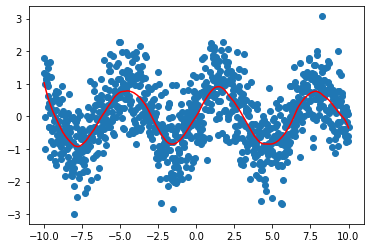

In [12]:
x, y = generate_data(-10, 10, 1000)
y_est = lowess(x, y, kernel=epanechnikov_kernel, h=1)
plt.scatter(x, y)
plt.plot(x, y_est, 'red')